# Classification

## Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
churn_df = pd.read_csv('churn_df.csv')

## Machine learning with scikit-learn

## The classification challenge

### k-Nearest Neighbors: Fit

In [5]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict

In [7]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [ ]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


## Measuring model performance

### Train/test split + computing accuracy

In [10]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


### Overfitting and underfitting

In [11]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9047261815453863, 3: 0.9081020255063766, 4: 0.8897224306076519, 5: 0.890847711927982, 6: 0.8874718679669917, 7: 0.8900975243810952, 8: 0.8818454613653414, 9: 0.8844711177794449, 10: 0.8795948987246812, 11: 0.8818454613653414, 12: 0.8765941485371342} 
 {1: 0.8290854572713643, 2: 0.863568215892054, 3: 0.8620689655172413, 4: 0.8725637181409296, 5: 0.8740629685157422, 6: 0.8755622188905547, 7: 0.8770614692653673, 8: 0.8740629685157422, 9: 0.8755622188905547, 10: 0.8770614692653673, 11: 0.8755622188905547, 12: 0.8755622188905547}


### Visualizing model complexity

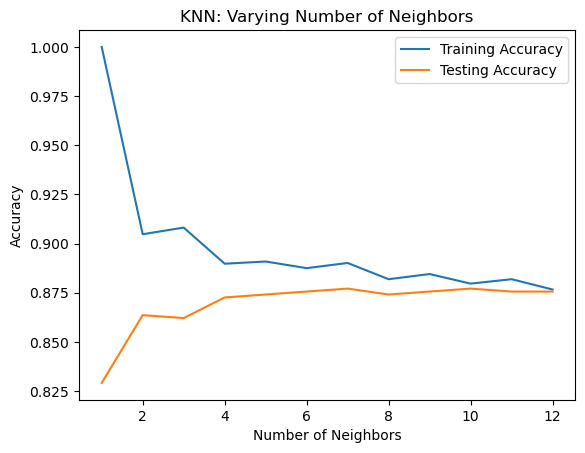

In [13]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()